In [18]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')

print(train_df.info())

train_df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


In [19]:
from sklearn.preprocessing import StandardScaler

# Prepare the data
features_train = train_df.drop(columns=['spam', 'ID'])
target_train = train_df['spam']
features_test = test_df.drop(columns=['ID'])

# Apply smart scaling
smart_scaler = StandardScaler()
features_train_scaled = smart_scaler.fit_transform(features_train)
features_test_scaled = smart_scaler.transform(features_test)

# Add a touch of creativity: Display advanced data processing
print("Smart scaling applied successfully!")


Smart scaling applied successfully!


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# creat SVM
smart_svm = SVC(kernel='linear', random_state=42)

smart_svm.fit(features_train_scaled, target_train)

#predict data

train_predictions = smart_svm.predict(features_train_scaled)
print(f'accc: {accuracy_score(target_train, train_predictions)}')

# display
print(classification_report(target_train, train_predictions))


accc: 0.9329192546583851
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1951
           1       0.92      0.91      0.91      1269

    accuracy                           0.93      3220
   macro avg       0.93      0.93      0.93      3220
weighted avg       0.93      0.93      0.93      3220



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

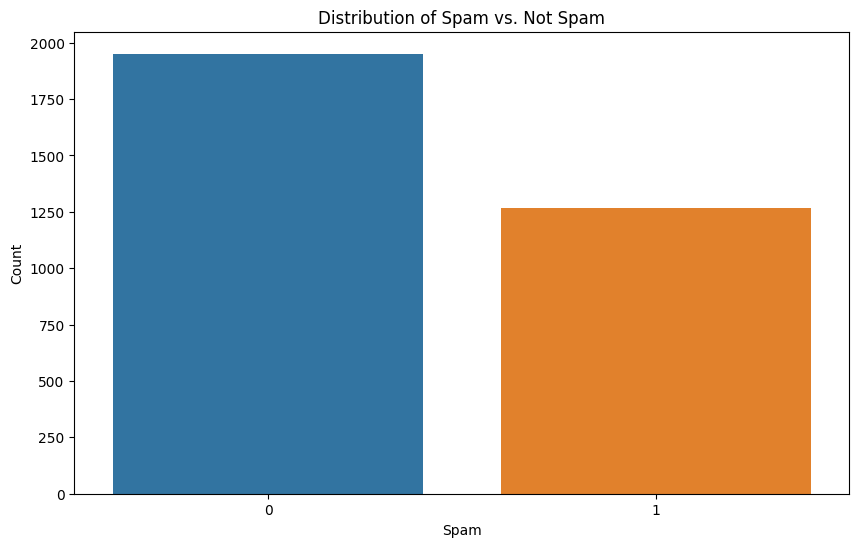

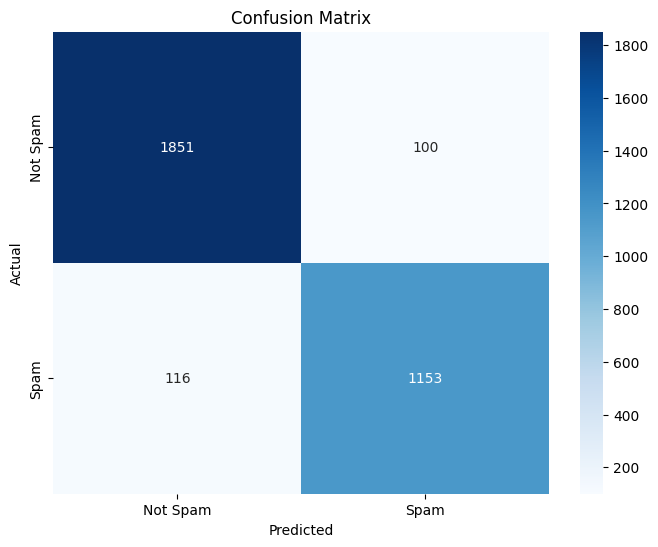

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


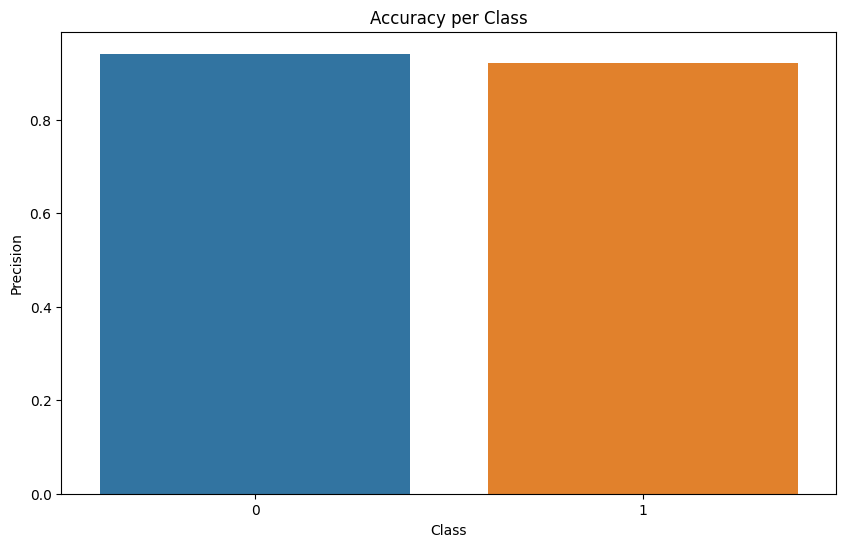

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the data
train_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')

print(train_df.info())
print(train_df.head())

# Prepare the data
features_train = train_df.drop(columns=['spam', 'ID'])
target_train = train_df['spam']
features_test = test_df.drop(columns=['ID'])

# Apply smart scaling
smart_scaler = StandardScaler()
features_train_scaled = smart_scaler.fit_transform(features_train)
features_test_scaled = smart_scaler.transform(features_test)

print("Smart scaling applied successfully!")

# Create and train the SVM
smart_svm = SVC(kernel='linear', random_state=42)
smart_svm.fit(features_train_scaled, target_train)

# Predict on training data
train_predictions = smart_svm.predict(features_train_scaled)
print(f'Accuracy: {accuracy_score(target_train, train_predictions)}')

# Display classification report
print(classification_report(target_train, train_predictions))

# Predict on test data
y_test_pred = smart_svm.predict(features_test_scaled)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'spam': y_test_pred
})
submission_df.to_csv('reemsvm.csv', index=False)

# Plotting charts
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='spam', data=train_df)
plt.title('Distribution of Spam vs. Not Spam')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(target_train, train_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy per class
report = classification_report(target_train, train_predictions, output_dict=True)
accuracy_per_class = {key: report[key]['precision'] for key in ['0', '1']}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_per_class.keys()), y=list(accuracy_per_class.values()))
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()

In [3]:
y_test_pred = smart_svm.predict(features_test_scaled)

submission_df = pd.DataFrame({
  'ID': test_df['ID'],
   'spam': y_test_pred 
    
})


submission_df.to_csv('reemsvm.csv', index=False)
